In [1]:
import pandas as pd
import numpy as np
import os

# 경고 메세지 off
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc # 폰트 설정과 한글깨짐 방기
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

from sklearn.metrics import silhouette_score # 성능 지표를 계산하기 위해 silhouette_score import
from sklearn.cluster import DBSCAN
import seaborn as sns
sns.set_style("darkgrid")
SEED=23

In [2]:
# Data load
address = './../data_processing/Dataset/'
data = pd.read_csv(os.path.join(address,'df_pm10_7day_result_1110.csv'), header = 0, encoding='cp949')

In [3]:
# in_serial = 장소 정보와 in_id =data sample id만 data_cd로 생성
data_cd = data[['in_serial','in_id']]
data_cd = data_cd.drop_duplicates()
data_cd = data_cd.set_index(keys='in_id')
# 클러스터링을 진행하기 위해 data table 형태 변환
df_pivot = pd.DataFrame()
for in_data_cd in data['in_id'].unique():
    sample = data[data['in_id'] == in_data_cd]
    time_index = []
    for i in range(0,len(sample)):
        time_index.append(i)
    sample['time_index'] = time_index
    df_pivot = pd.concat([df_pivot,sample], ignore_index=True)
df_pivot= df_pivot.pivot_table(index="time_index", columns="in_id", values="in_pm10_day")

#  1. 1일 데이터로 자르기

In [4]:
data_allSerial_1day = df_pivot.loc[:143]
data_allSerial_1day

in_id,ICL1L2000011,ICL1L2000017,ICL1L2000064,ICL1L2000065,ICL1L2000234,ICL1L2000235,ICL1L2000236,ICL1L2000237,ICL1L2000238,ICL1L2000239,...,ICW0W2100277,ICW0W2100278,IS70W2000822,IS70W2000851,IS70W2000852,IS70W2000853,IS70W2000854,IS70W2000855,IS70W2000856,IS70W2000858
time_index,,,,,,,,,,,,,,,,,,,,,
0,21.5,11.4,15.3,16.2,43.3,29.1,18.6,23.5,61.0,52.7,...,3.0,3.2,98.97,9.9,5.0,5.9,0.7,8.7,14.1,12.6
1,22.3,11.3,15.2,16.2,43.5,28.8,18.5,23.3,60.9,52.5,...,3.2,3.8,98.94,8.5,5.0,6.2,1.0,9.5,14.6,12.2
2,21.8,11.3,16.1,16.6,42.5,27.8,18.6,23.7,60.6,52.5,...,3.4,3.3,98.76,8.2,4.4,6.0,0.7,8.9,13.8,12.3
3,21.5,11.5,14.5,16.7,41.9,27.0,19.0,23.6,60.4,52.6,...,3.4,3.7,98.42,8.2,4.5,5.6,0.8,9.0,13.1,12.2
4,21.5,11.1,16.9,16.9,42.2,27.5,18.5,23.8,60.2,52.0,...,3.6,3.8,98.59,6.9,5.4,5.6,0.7,6.9,11.7,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,40.0,13.4,41.7,16.7,23.5,3.0,58.9,19.1,64.7,24.0,...,8.7,7.5,96.94,2.0,3.0,1.3,7.2,0.8,3.8,7.3
140,39.2,13.4,41.1,16.9,23.7,2.8,57.8,19.6,65.3,22.3,...,8.1,7.8,96.91,1.8,3.0,1.6,6.9,0.7,2.6,6.8
141,45.4,13.1,40.5,17.0,23.0,2.7,57.5,19.4,65.0,22.0,...,8.6,7.1,97.21,2.2,2.4,2.0,7.4,0.7,4.1,6.2


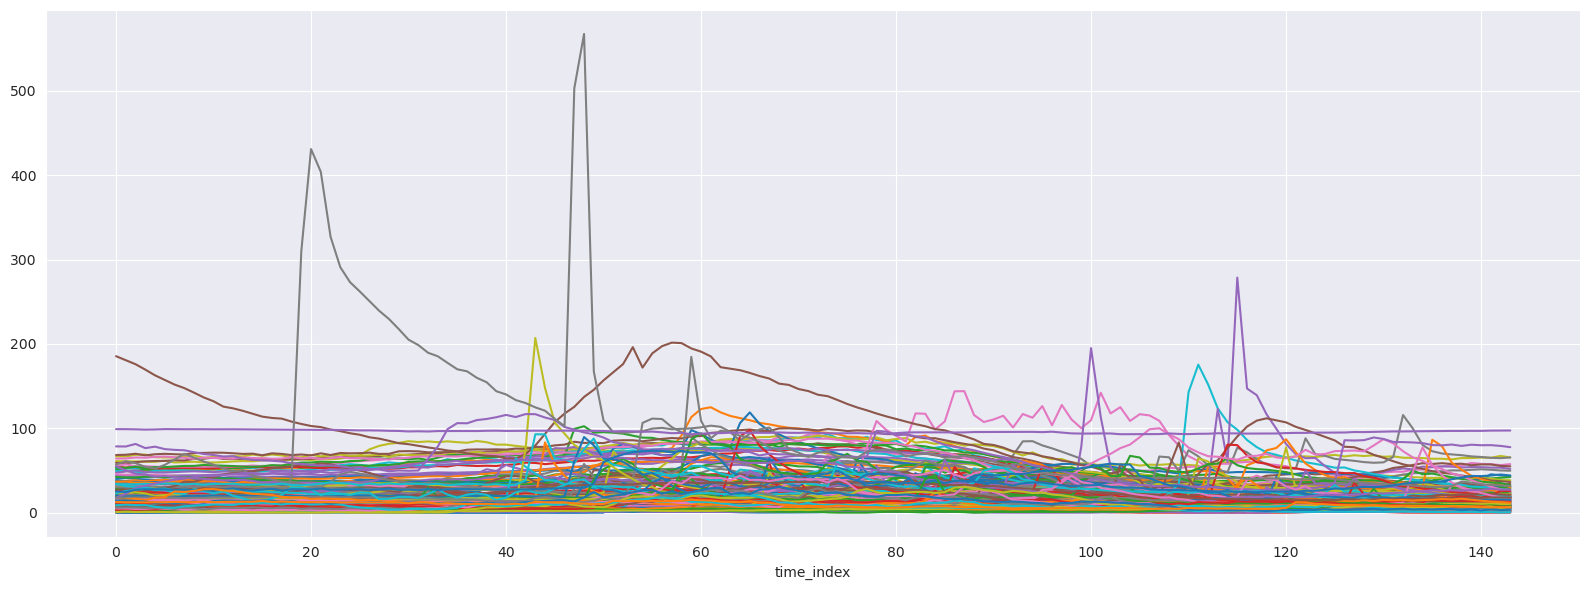

In [5]:
data_allSerial_1day.plot(legend = False, figsize=(16,6))
plt.tight_layout()

#  2. 각 컬럼 데이터 NaN 데이터 처리

In [6]:
# 선형보간법 사용
df_pivot_int = data_allSerial_1day.interpolate(method='linear') 
df_pivot_int_test = df_pivot_int.reindex(df_pivot_int.index, method="ffill")
df_pivot_int_test = df_pivot_int.reindex(df_pivot_int.index, method="bfill")
print("NaN processing (count):", np.isnan(data_allSerial_1day.values).sum(), "->", np.isnan(df_pivot_int_test.values).sum())

NaN processing (count): 45 -> 0


In [7]:
# Pivot Table
series_df = df_pivot_int_test.T
series_df = series_df.dropna(axis='columns')
series_df.head()

time_index,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
in_id,,,,,,,,,,,,,,,,,,,,,
ICL1L2000011,21.5,22.3,21.8,21.5,21.5,21.1,20.3,21.777778,22.4,21.9,...,39.4,41.2,33.8,41.4,41.3,40.0,39.2,45.4,44.3,43.1
ICL1L2000017,11.4,11.3,11.3,11.5,11.1,11.8,12.0,12.200000,12.4,13.1,...,11.7,12.5,12.6,12.8,12.9,13.4,13.4,13.1,13.3,14.8
ICL1L2000064,15.3,15.2,16.1,14.5,16.9,15.3,15.5,15.500000,15.9,16.8,...,37.8,38.0,40.3,40.6,41.5,41.7,41.1,40.5,41.3,42.2
ICL1L2000065,16.2,16.2,16.6,16.7,16.9,16.6,16.8,17.100000,17.3,17.3,...,17.8,17.1,17.7,16.2,16.4,16.7,16.9,17.0,16.3,15.8
ICL1L2000234,43.3,43.5,42.5,41.9,42.2,41.8,42.8,42.800000,42.9,43.0,...,24.3,24.1,23.6,23.7,23.9,23.5,23.7,23.0,22.0,22.0


In [8]:
# Scaling
from sklearn.preprocessing import StandardScaler # 데이터 정규화에 사용할 StandardScaler import
scaler = StandardScaler() # StandardScaler 정규화 객체 생성

scaled_ts = scaler.fit_transform(series_df.T).T # df_pivot에 대해 정규화를 진행함
scaled_ts_df = pd.DataFrame(scaled_ts)
namesofMySeries = list(series_df.index)

  0%|          | 0/7 [00:00<?, ?it/s]

Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


54.663 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


21.858 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


21.438 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


21.173 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


20.765 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


20.721 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


20.721 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


58.720 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


22.081 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


21.932 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


21.642 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


21.370 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


21.161 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


21.161 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 304 out of 304 | elapsed:    0.1s finished


[0, 144] [-2.5082852696402487, 9.483090506973957]
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


38.458 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


18.159 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


17.216 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


17.140 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


17.134 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


17.134 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


36.587 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


16.307 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


16.017 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


15.983 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


15.983 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


[0, 144] [-2.5082852696402487, 9.483090506973957]
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.2s finished


29.334 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.2s finished


15.027 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.2s finished


14.198 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.2s finished


13.641 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.2s finished


13.549 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.2s finished


13.542 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.2s finished


13.542 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.2s finished


29.770 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished


16.093 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished


15.602 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished


15.279 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished


15.232 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished


15.228 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished


15.228 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished


[0, 144] [-2.5082852696402487, 9.483090506973957]
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


26.259 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


12.685 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


11.858 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


11.668 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


11.668 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


26.374 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


14.309 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


13.732 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


13.584 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


13.446 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


13.383 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


12.667 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


12.336 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


12.309 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


12.264 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 760 out of 760 | elapsed:    0.2s finished


[0, 144] [-2.5082852696402487, 9.483090506973957]
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

22.560 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


11.903 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


11.160 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


10.949 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


10.949 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

26.105 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


13.980 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


12.894 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


12.243 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


11.917 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


11.717 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


11.579 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


11.575 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


11.575 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 912 out of 912 | elapsed:    0.2s finished


[0, 144] [-2.5082852696402487, 9.483090506973957]
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

21.399 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1064 out of 1064 | elapsed:    0.2s finished


11.332 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1064 out of 1064 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


10.536 --> 

[Parallel(n_jobs=1)]: Done 1064 out of 1064 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


10.536 --> 
Init 2


[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1064 out of 1064 | elapsed:    0.2s finished


22.817 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1064 out of 1064 | elapsed:    0.2s finished


11.393 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1064 out of 1064 | elapsed:    0.2s finished


10.851 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1064 out of 1064 | elapsed:    0.2s finished


10.797 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1064 out of 1064 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


10.784 --> 

[Parallel(n_jobs=1)]: Done 1064 out of 1064 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


10.784 --> 


[Parallel(n_jobs=1)]: Done 1064 out of 1064 | elapsed:    0.2s finished


[0, 144] [-2.5082852696402487, 9.483090506973957]
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

20.888 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished


11.289 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished


10.639 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


10.558 --> 

[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished


10.558 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 608 out of 608 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

20.966 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished


11.195 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished


10.520 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished


10.113 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished


9.936 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


9.919 --> 

[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


9.919 --> 


[Parallel(n_jobs=1)]: Done 1216 out of 1216 | elapsed:    0.3s finished


[0, 144] [-2.5082852696402487, 9.483090506973957]


<AxesSubplot: xlabel='n_clusters'>

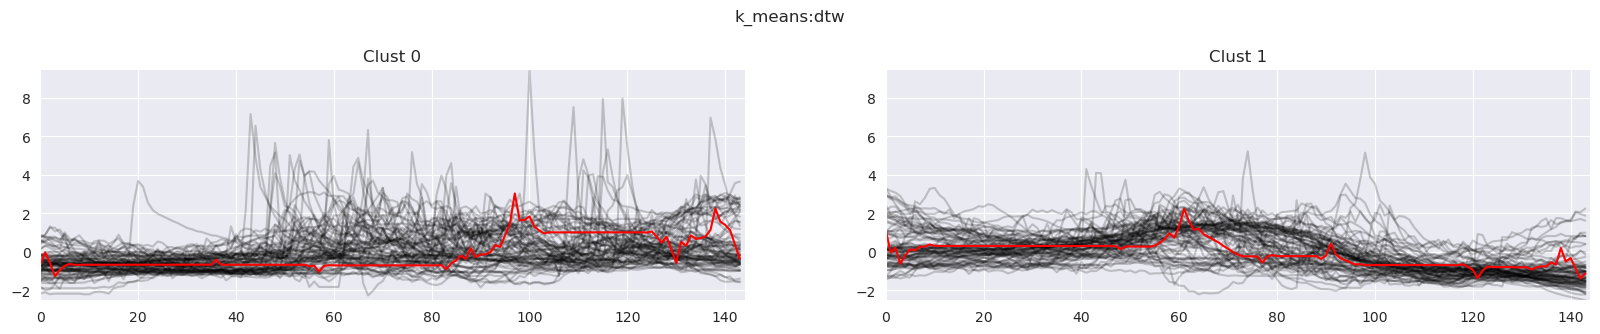

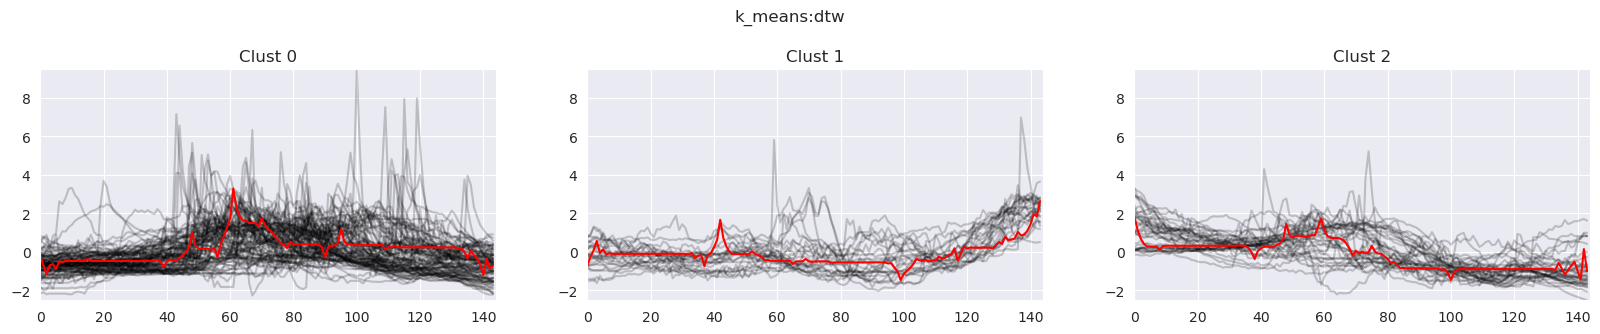

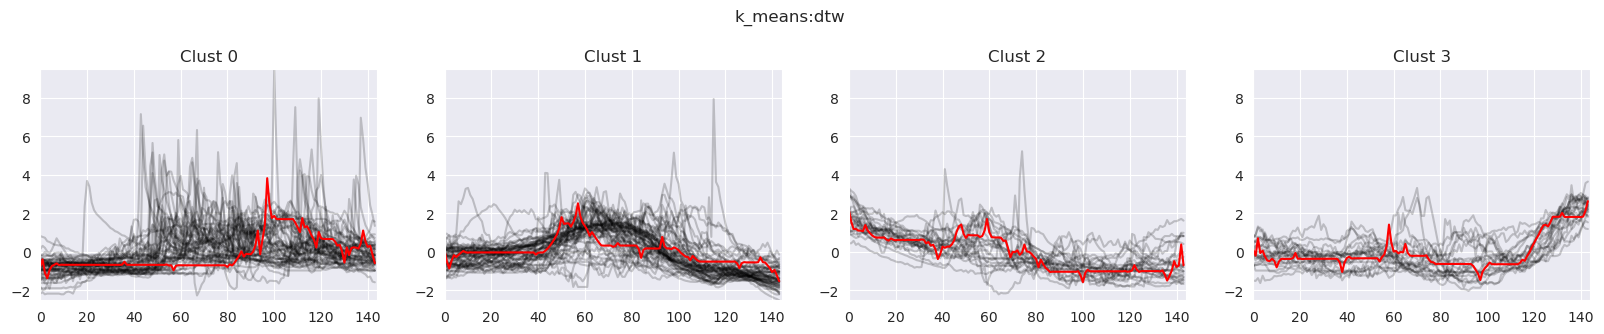

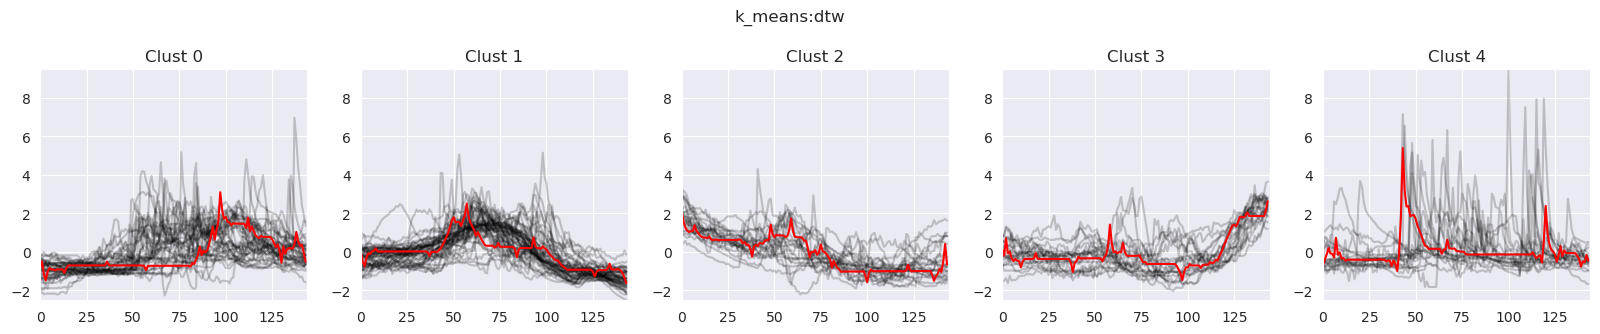

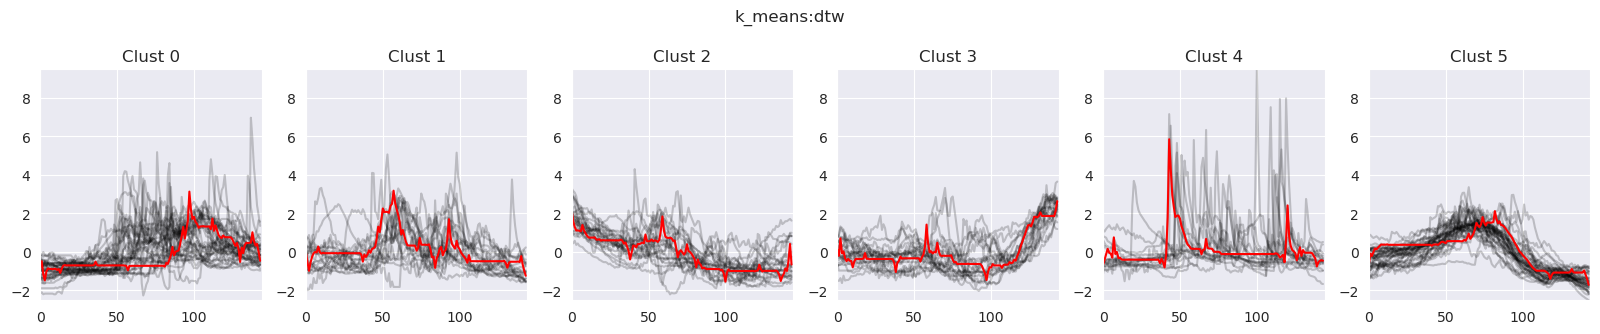

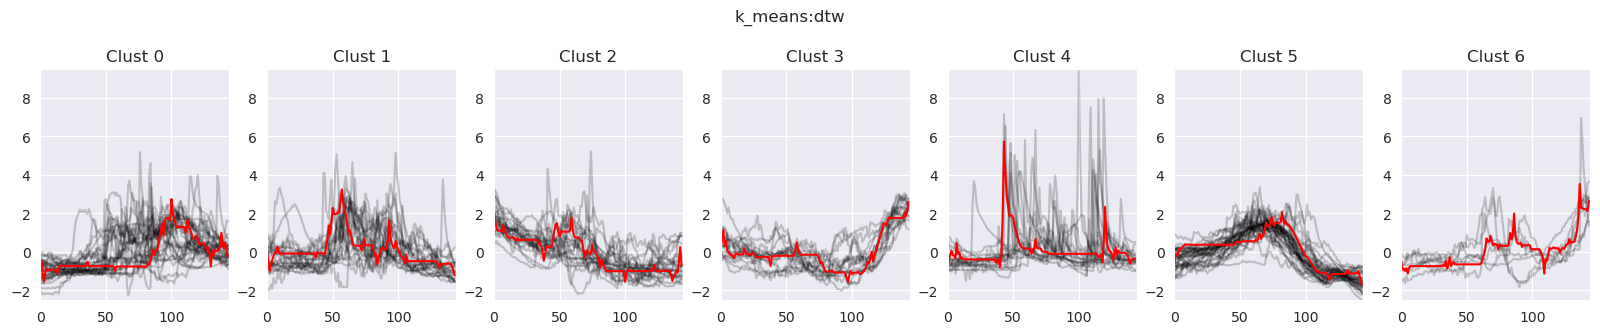

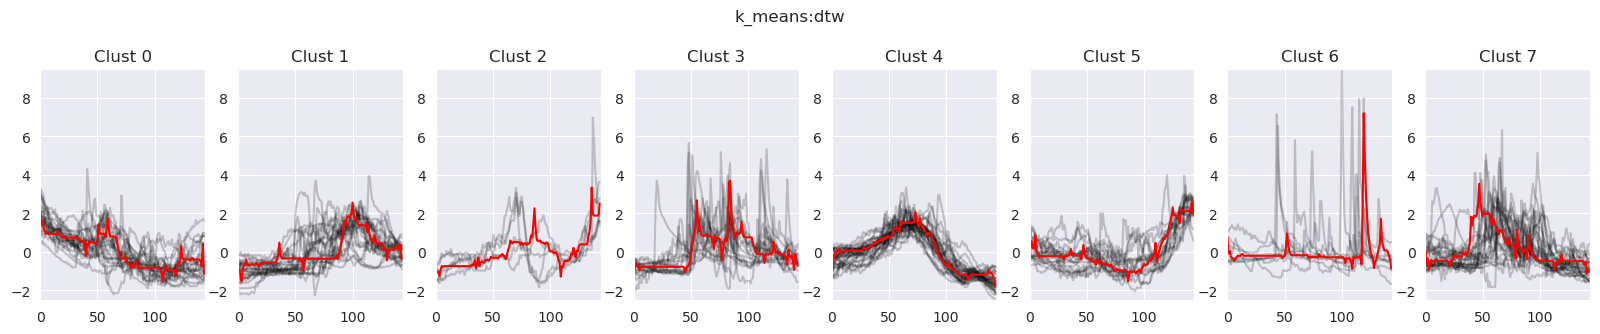

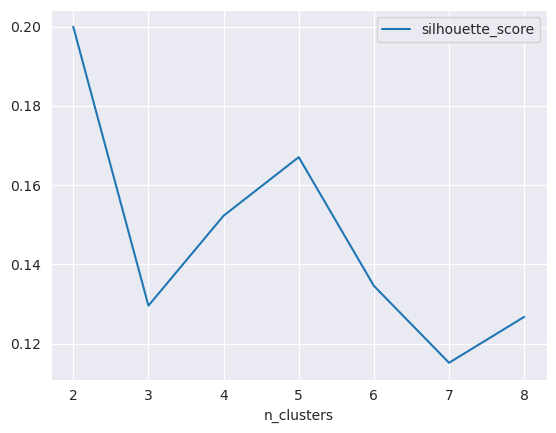

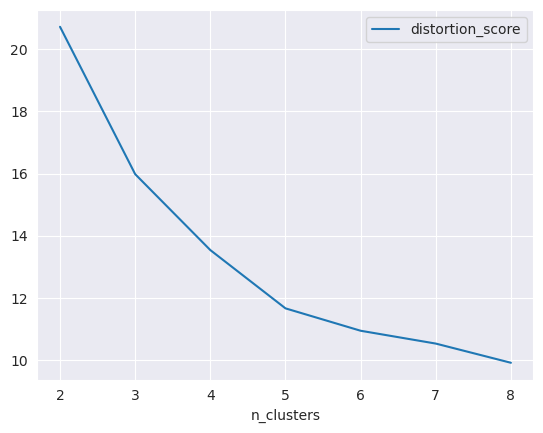

In [9]:
import sys
sys.path.append("../")
sys.path.append("../../")

from Clust.clust.ML.clustering.kMeans import KMeans

max_clusters = 9
kmeans_method_list =['euclidean', 'dtw', 'softdtw']
kmeans_method = kmeans_method_list[1]
data =scaled_ts_df.values
cluster_labels, metrics = KMeans().get_multipleCluster_result(data, max_clusters, kmeans_method)
metrics[["silhouette_score"]].plot()
metrics[["distortion_score"]].plot()

Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


38.458 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


18.159 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


17.216 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


17.140 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


17.134 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


17.134 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


36.587 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


16.307 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


16.017 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


15.983 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


15.983 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 456 out of 456 | elapsed:    0.1s finished


[0, 144] [-2.5082852696402487, 9.483090506973957]


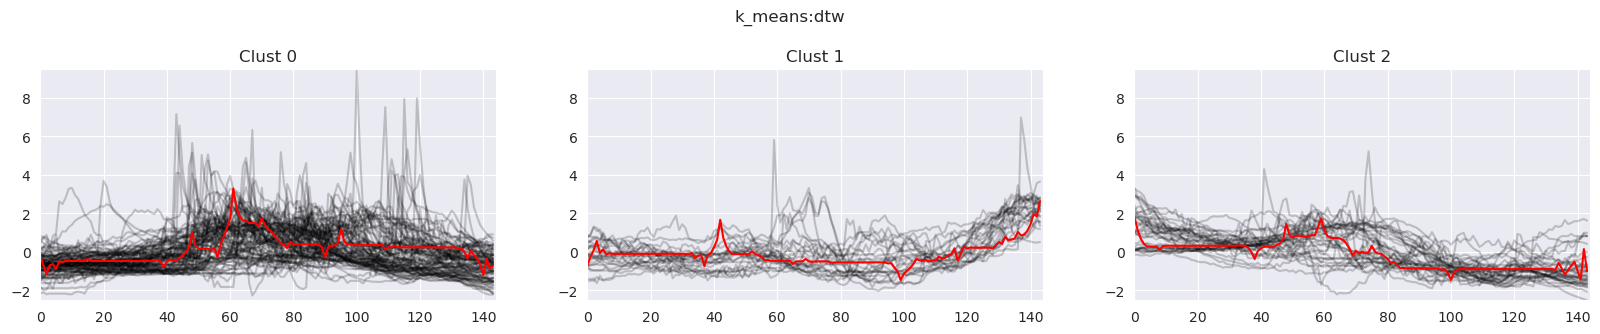

In [10]:
n_clusters = 3
model, cluster_labels = KMeans(). get_oneCluster_result(data, n_clusters, kmeans_method)

In [11]:
from Clust.clust.transformation.featureReduction.pca import show_clustering_result_by2DPCA
data_2d = show_clustering_result_by2DPCA(data, cluster_labels)

Dimension:  144 ----> 2


TypeError: 'NoneType' object is not iterable

In [ ]:
from Clust.clust.ML.clustering.util import count_lbel_info
count = count_label_info(cluster_labels)

In [ ]:
def get_DBSCAN_parameter(data, eps_values = np.arange(3,8.75,0.25), min_samples = np.arange(3,10)):
    from itertools import product # 효율적으로 loop를 생성하기 위한 라이브러리
    """
    DBSCAN parameter 탐색 code

    data: pd.DataFrame or np.array
        Time Series Data

    eps_values: np.arange
        eps of DBSCAN
        # eps values to be investigated

    min_samples: np.arange
        min_sample of DBSCAN
        # min_samples values to be investigated
    Returns:
    -------
    None
    """
    DBSCAN_params = list(product(eps_values, min_samples))

    no_of_clusters = []
    sil_score = []
    noise = []
    eps = []
    min_sample = []

    for p in DBSCAN_params:
        DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(data)
        clusters = DBS_clustering.labels_
        n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise_ = list(clusters).count(-1)

        if n_clusters_ > 1:
            eps.append(p[0])
            min_sample.append(p[1])
            noise.append(n_noise_)
            no_of_clusters.append(n_clusters_)
            sil_score.append(silhouette_score(data, clusters))


    dict = {'Eps': eps,'Min_samples': min_sample}
    tmp= pd.DataFrame(dict)
    #######################################No_of_clusters############################################################
    tmp['No_of_clusters'] = no_of_clusters
    pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

    fig, ax = plt.subplots(figsize=(12,6))
    sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
    ax.set_title('Number of clusters')
    plt.show()

    ###########################################Sil_score########################################################
    tmp['Sil_score'] = sil_score
    pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

    fig, ax = plt.subplots(figsize=(18,6))
    sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax, fmt = '.3f')
    ax.set_title('Sil score')
    plt.show()

    ###########################################Noise########################################################
    tmp['Noise'] = noise
    pivot_1 = pd.pivot_table(tmp, values='Noise', index='Min_samples', columns='Eps')

    fig, ax = plt.subplots(figsize=(18,6))
    sns.heatmap(pivot_1, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", ax=ax, fmt = '.1f')
    ax.set_title('Noise')
    plt.show()



In [ ]:
# DBSCAN을 eps_values 범위와 min_samples로 각각 진행하여 클러스터 수와 Sil_score, Noise 결과 시각화
get_DBSCAN_parameter(scaled_ts_df, eps_values = np.arange(5,10,0.25), min_samples = np.arange(3,15))

In [ ]:
def get_DBSCAN_results(data, min_samples=10, eps = 0.726):
    """
    파라미터를 지정하여 DBSCAN 결과 생성

    data: pd.DataFrame or np.array
        Time Series Data
    min_samples: int
        # 최소 요소 갯수
    eps: int
        # R와 역할, 반지름 지정

    Returns:
    -------
    None
    """
    # Main metrics
    
    DBSCAN_model = DBSCAN(eps=eps, min_samples = min_samples)
    DBSCAN_model.fit(data)
    clusters_ss= DBSCAN_model.fit_predict(data)
    clusters = DBSCAN_model.labels_
    n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise_ = list(clusters).count(-1)


    core_samples = np.zeros_like(clusters, dtype=bool)
    core_samples[DBSCAN_model.core_sample_indices_] = True
    #print("Number of core samples:", core_samples)


    print("Number of clusters: %d" % n_clusters_)
    print("Number of noise points: %d" % n_noise_)
    for i in range(n_clusters_):
        print('Cluster', i, ':', len(clusters[clusters==i]))

    print("Silhouette Coefficient: %0.3f" % silhouette_score(data, clusters))



In [ ]:
# min_samples=12, eps = 8.5의 DBSCAN 결과
get_DBSCAN_results(data = scaled_ts_df , min_samples=12, eps = 8.5)

In [ ]:
# in_id의 군집결과 조회
cluster_model = DBSCAN(min_samples=12, eps = 8.5)
cluster_labels = cluster_model.fit_predict(scaled_ts_df)
fancy_names_for_labels = [f"Cluster {label}" for label in cluster_labels]
result = pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")
ts_clustered = [scaled_ts_df.iloc[(cluster_labels == lable), :] for lable in np.unique(cluster_labels)]
result

In [ ]:
# 군집별 data sample 수 조회
merge_outer = pd.merge(result,data_cd, how='outer', left_index=True, right_index=True)
result_cnt = merge_outer.groupby('Cluster').count().reset_index()
result_cnt

## clustering 결과 시각화

In [ ]:
# cluster_model = DBSCAN(min_samples=12, eps = 8.5)

for cluster in range(len(ts_clustered)):
    print(f"==========Cluster number: {cluster}==========")
    plot_cluster_ts(ts_clustered[cluster])

## clustering 결과 라벨링

In [ ]:
pm10_clustering_result= df_pivot_int_test.T.copy()
pm10_clustering_result = pm10_clustering_result.reset_index()

In [ ]:
# 클러스터 결과와 input data set을 merge 하여 예측을 위한 data set 생성
result = result.reset_index()
test = pd.merge(pm10_clustering_result,result, how='left', left_on='in_id', right_on='Series')

In [ ]:
PM10_clustering_result = test.drop(["Series"], axis=1)

In [ ]:
PM10_clustering_result.head()

In [ ]:
# 클러스터링 결과 csv 저장
address = './../data_processing/Dataset/'
test.to_csv(os.path.join(address,'PM10_clustering_1day_result.csv'), encoding="cp949", index=False)

In [ ]:
set(test.Cluster)